In [1]:
#_________________ Applied Statistics 2024/2025 _________________________________

#### 7.1.Hidden Markov models [HMM package]  ####
#_______________________________________________#

In [2]:
install.packages("HMM")
library(HMM)


The downloaded binary packages are in
	/var/folders/2n/xc_5x6ys00q7kj5lcfn2s10r0000gn/T//Rtmp1F8l4H/downloaded_packages


In [3]:
### Summary:
### - EXAMPLE 0: A simulated example for understanding how to use the HMM package
### - EXAMPLE 1: Dishonest casino example
### - EXAMPLE 2: DNA sequence

In [4]:
#_______________________________________________________________________________
##### EXAMPLE 0: A simulated example for understanding how to use the HMM package #####

In [5]:
# How to initialize our HMM
?initHMM

initHMM                  package:HMM                   R Documentation

_I_n_i_t_i_a_l_i_s_a_t_i_o_n _o_f _H_M_M_s

_D_e_s_c_r_i_p_t_i_o_n:

     This function initialises a general discrete time and discrete
     space Hidden Markov Model (HMM). A HMM consists of an alphabet of
     states and emission symbols. A HMM assumes that the states are
     hidden from the observer, while only the emissions of the states
     are observable. The HMM is designed to make inference on the
     states through the observation of emissions. The stochastics of
     the HMM is fully described by the initial starting probabilities
     of the states, the transition probabilities between states and the
     emission probabilities of the states.

_U_s_a_g_e:

     initHMM(States, Symbols, startProbs=NULL, transProbs=NULL, emissionProbs=NULL)
     
_A_r_g_u_m_e_n_t_s:

  States: Vector with the names of the states.

 Symbols: Vector with the names of the symbo

In [6]:
# Initialise HMM nr.1
hmm1 = initHMM(c("X","Y"),               # States: Vector with the names of the states
                c("a","b","c")            # Symbols: Vector with the names of the symbols.
                )
hmm1

$States
[1] "X" "Y"

$Symbols
[1] "a" "b" "c"

$startProbs
  X   Y 
0.5 0.5 

$transProbs
    to
from    X    Y
   X 0.75 0.25
   Y 0.25 0.75

$emissionProbs
      symbols
states         a         b         c
     X 0.3333333 0.3333333 0.3333333
     Y 0.3333333 0.3333333 0.3333333

In [7]:
# Initialise HMM nr.2
hmm2 = initHMM(c("X","Y"),               # States: Vector with the names of the states
               c("a","b"),               # Symbols: Vector with the names of the symbols.
               c(.3,.7),                 # startProbs: Vector with the starting probabilities of the states.
               matrix(c(.9,.1,.1,.9),2), # transProbs: Stochastic matrix containing the transition probabilities between the states.
               matrix(c(.3,.7,.7,.3),2)  # emissionProbs: Stochastic matrix containing the emission probabilities of the states.
               )
hmm2

,X,Y
X,0.9,0.1
Y,0.1,0.9
,a,b
X,0.3,0.7
Y,0.7,0.3


In [8]:
### A simulated example

# Initial HMM
hmm3 = initHMM(c("A","B"),
               c("L","R"),
               transProbs = matrix(c(.9,.1,.1,.9),2),
               emissionProbs = matrix(c(.5,.51,.5,.49),2)
               )
print(hmm3)

$States
[1] "A" "B"

$Symbols
[1] "L" "R"

$startProbs
  A   B 
0.5 0.5 

$transProbs
    to
from   A   B
   A 0.9 0.1
   B 0.1 0.9

$emissionProbs
      symbols
states    L    R
     A 0.50 0.50
     B 0.51 0.49



In [9]:
# Simulate from the HMM
# Simulates a path of states and observations for a given Hidden Markov Model.
simHMM(hmm3, 100)

$states
  [1] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "B" "B"
 [19] "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "A" "A" "A" "A" "A" "A" "A" "A"
 [37] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
 [55] "A" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "A" "A" "A" "A"
 [73] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
 [91] "A" "A" "A" "A" "A" "A" "A" "B" "B" "B"

$observation
  [1] "L" "L" "R" "L" "L" "L" "R" "R" "R" "L" "R" "R" "R" "R" "R" "L" "L" "L"
 [19] "R" "L" "L" "L" "L" "L" "L" "L" "L" "L" "R" "L" "R" "L" "R" "L" "L" "R"
 [37] "R" "R" "R" "R" "L" "L" "L" "L" "R" "L" "R" "L" "R" "L" "L" "L" "L" "R"
 [55] "R" "L" "R" "R" "L" "L" "R" "L" "R" "R" "R" "L" "R" "R" "L" "R" "L" "R"
 [73] "L" "L" "R" "L" "R" "R" "R" "L" "R" "L" "R" "L" "R" "L" "L" "L" "L" "L"
 [91] "R" "R" "L" "L" "L" "R" "L" "L" "L" "L"

In [10]:
# Let's define a sequence of observation
a = sample(c(rep("L",100), rep("R",300)))
b = sample(c(rep("L",300), rep("R",100)))
observation = c(a,b)
observation # vector of symbols

[1] "L" "R" "R" "R" "R" "R" "R" "L" "R" "R" "R" "R" "R" "R" "R" "R" "R" "R"
 [19] "L" "L" "R" "L" "L" "R" "R" "R" "R" "R" "R" "L" "R" "R" "R" "R" "R" "R"
 [37] "R" "L" "R" "R" "R" "R" "R" "R" "R" "R" "R" "R" "R" "R" "R" "R" "R" "L"
 [55] "L" "R" "R" "R" "R" "R" "R" "R" "R" "R" "R" "R" "L" "R" "R" "R" "R" "R"
 [73] "L" "R" "R" "R" "R" "R" "L" "R" "R" "L" "L" "R" "R" "R" "L" "R" "R" "L"
 [91] "R" "L" "R" "R" "R" "R" "R" "R" "R" "L" "R" "R" "R" "L" "R" "R" "L" "R"
[109] "L" "R" "R" "L" "R" "R" "R" "L" "R" "L" "R" "R" "R" "R" "R" "R" "R" "R"
[127] "R" "R" "R" "L" "R" "R" "L" "L" "R" "R" "R" "L" "R" "L" "R" "L" "R" "R"
[145] "R" "R" "R" "R" "L" "R" "R" "R" "R" "L" "R" "R" "R" "L" "R" "R" "R" "R"
[163] "R" "R" "R" "R" "L" "L" "R" "R" "R" "R" "L" "R" "R" "L" "R" "R" "R" "L"
[181] "L" "R" "L" "R" "R" "R" "L" "R" "L" "R" "L" "L" "R" "R" "R" "R" "L" "R"
[199] "L" "R" "R" "R" "L" "R" "R" "L" "L" "R" "L" "R" "R" "R" "R" "R" "R" "R"
[217] "R" "R" "R" "R" "L" "R" "L" "R" "L" "R" "R" "L" "L" "L" "R" "L" "L" "R"
[235] "L" "R" "L" "R" "R" "R" "L" "R" "R" "R" "R" "R" "R" "R" "R" "R" "R" "R"
[253] "R" "L" "R" "L" "L" "L" "R" "R" "L" "R" "R" "L" "L" "R" "R" "R" "L" "R"
[271] "L" "R" "R" "L" "R" "R" "R" "R" "R" "R" "R" "L" "R" "R" "R" "R" "R" "R"
[289] "L" "L" "R" "R" "L" "R" "R" "R" "R" "R" "R" "L" "R" "R" "R" "L" "L" "L"
[307] "R" "R" "R" "R" "R" "R" "R" "R" "R" "R" "L" "R" "R" "L" "L" "L" "R" "L"
[325] "R" "L" "R" "R" "R" "R" "L" "R" "R" "R" "L" "R" "R" "R" "R" "L" "R" "R"
[343] "L" "R" "L" "R" "R" "R" "R" "R" "R" "R" "L" "R" "R" "R" "R" "R" "R" "R"
[361] "R" "R" "R" "R" "R" "R" "R" "R" "R" "R" "L" "R" "R" "R" "R" "R" "R" "R"
[379] "R" "R" "R" "R" "R" "R" "L" "R" "R" "R" "L" "L" "L" "R" "R" "R" "L" "R"
[397] "L" "L" "R" "R" "L" "L" "L" "L" "L" "R" "L" "L" "L" "R" "R" "R" "L" "R"
[415] "L" "L" "L" "R" "L" "R" "L" "R" "L" "L" "R" "L" "L" "R" "L" "R" "R" "R"
[433] "L" "R" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L"
[451] "L" "R" "L" "L" "L" "R" "L" "L" "L" "L" "L" "L" "L" "R" "L" "L" "L" "L"
[469] "R" "L" "L" "L" "L" "R" "L" "L" "L" "L" "L" "L" "L" "R" "L" "L" "L" "R"
[487] "L" "L" "L" "L" "L" "L" "R" "L" "R" "L" "L" "R" "L" "L" "L" "R" "R" "L"
[505] "L" "R" "L" "R" "L" "R" "L" "R" "R" "L" "L" "R" "L" "L" "L" "L" "L" "R"
[523] "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "R" "L" "L" "L" "L" "L" "L"
[541] "L" "L" "L" "R" "L" "R" "L" "R" "L" "L" "L" "L" "L" "R" "L" "R" "L" "L"
[559] "L" "L" "R" "L" "L" "L" "L" "L" "L" "L" "L" "R" "L" "L" "L" "L" "L" "L"
[577] "L" "L" "R" "L" "L" "L" "R" "L" "L" "L" "L" "L" "R" "R" "R" "L" "L" "L"
[595] "L" "R" "R" "L" "L" "L" "L" "L" "L" "L" "L" "R" "L" "R" "R" "L" "L" "L"
[613] "L" "R" "L" "L" "L" "R" "R" "R" "R" "L" "L" "L" "R" "L" "L" "R" "L" "L"
[631] "R" "L" "L" "L" "L" "L" "R" "L" "L" "L" "L" "L" "L" "R" "L" "L" "R" "R"
[649] "R" "L" "R" "L" "L" "L" "L" "L" "L" "L" "L" "L" "R" "R" "L" "L" "L" "L"
[667] "L" "R" "L" "R" "R" "L" "R" "L" "L" "L" "L" "R" "R" "L" "L" "L" "L" "R"
[685] "L" "R" "L" "L" "L" "R" "L" "L" "L" "L" "R" "L" "R" "L" "R" "L" "L" "L"
[703] "R" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "R" "R" "L" "L"
[721] "L" "R" "R" "L" "L" "L" "L" "L" "L" "R" "R" "L" "L" "L" "L" "L" "L" "L"
[739] "L" "R" "L" "R" "L" "L" "R" "L" "R" "L" "R" "R" "R" "L" "L" "L" "L" "L"
[757] "L" "L" "L" "L" "L" "L" "R" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L"
[775] "R" "L" "L" "L" "R" "R" "L" "L" "L" "L" "L" "L" "R" "L" "L" "L" "L" "L"
[793] "L" "R" "L" "L" "R" "L" "L" "L"

In [11]:
# Viterbi
?viterbi
viterbi(hmm3, observation) # most probable path of hidden states

[1] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
 [19] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
 [37] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
 [55] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
 [73] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
 [91] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
[109] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
[127] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
[145] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
[163] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
[181] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
[199] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
[217] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
[235] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
[253] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
[271] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
[289] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
[307] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
[325] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
[343] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
[361] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
[379] "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A" "A"
[397] "A" "A" "A" "A" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
[415] "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
[433] "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
[451] "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
[469] "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
[487] "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
[505] "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
[523] "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
[541] "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
[559] "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
[577] "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
[595] "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
[613] "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
[631] "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
[649] "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
[667] "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
[685] "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
[703] "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
[721] "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
[739] "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
[757] "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
[775] "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B" "B"
[793] "B" "B" "B" "B" "B" "B" "B" "B"

viterbi                  package:HMM                   R Documentation

_C_o_m_p_u_t_e_s _t_h_e _m_o_s_t _p_r_o_b_a_b_l_e _p_a_t_h _o_f _s_t_a_t_e_s

_D_e_s_c_r_i_p_t_i_o_n:

     The Viterbi-algorithm computes the most probable path of states
     for a sequence of observations for a given Hidden Markov Model.

_U_s_a_g_e:

     viterbi(hmm, observation)
     
_A_r_g_u_m_e_n_t_s:

     hmm: A Hidden Markov Model.

observation: A sequence of observations.

_F_o_r_m_a_t:

     Dimension and Format of the Arguments.

     hmm A valid Hidden Markov Model, for example instantiated by
          'initHMM'.

     observation A vector of observations.

_V_a_l_u_e:

     Return Value:

viterbiPath: A vector of strings, containing the most probable path of
          states.

_A_u_t_h_o_r(_s):

     Lin Himmelmann <hmm@linhi.com>, Scientific Software Development

_R_e_f_e_r_e_n_c_e_s:

     Lawrence R. Rabiner

In [12]:
# Baum-Welch ?baumWelch
bw = baumWelch(hmm3, observation, maxIterations = 100) 
print(bw$hmm) # optimal parameters to the HMM

$States
[1] "A" "B"

$Symbols
[1] "L" "R"

$startProbs
  A   B 
0.5 0.5 

$transProbs
    to
from            A           B
   A 9.974619e-01 0.002538133
   B 1.189767e-12 1.000000000

$emissionProbs
      symbols
states         L         R
     A 0.2469937 0.7530063
     B 0.7455165 0.2544835



In [13]:
# Posterior probabilities for the states
# This function computes the posterior probabilities of being in state X at time k 
# for a given sequence of observations and a given Hidden Markov Model.                 ?posterior
posterior(hmm3, observation) 

,1,2,3,4,5,6,7,8,9,10,...,791,792,793,794,795,796,797,798,799,800
A,0.5126288,0.5180145,0.5220276,0.5248703,0.5266861,0.5275664,0.5275556,0.5266532,0.5293082,0.5311592,...,0.4718315,0.4732383,0.475532,0.4788282,0.4787947,0.4799268,0.4822815,0.4814789,0.4819765,0.4837994
B,0.4873712,0.4819855,0.4779724,0.4751297,0.4733139,0.4724336,0.4724444,0.4733468,0.4706918,0.4688408,...,0.5281685,0.5267617,0.524468,0.5211718,0.5212053,0.5200732,0.5177185,0.5185211,0.5180235,0.5162006


posterior                 package:HMM                  R Documentation

_C_o_m_p_u_t_e_s _t_h_e _p_o_s_t_e_r_i_o_r _p_r_o_b_a_b_i_l_i_t_i_e_s _f_o_r _t_h_e _s_t_a_t_e_s

_D_e_s_c_r_i_p_t_i_o_n:

     This function computes the posterior probabilities of being in
     state X at time k for a given sequence of observations and a given
     Hidden Markov Model.

_U_s_a_g_e:

     posterior(hmm, observation)
     
_A_r_g_u_m_e_n_t_s:

     hmm: A Hidden Markov Model.

observation: A sequence of observations.

_F_o_r_m_a_t:

     Dimension and Format of the Arguments.

     hmm A valid Hidden Markov Model, for example instantiated by
          'initHMM'.

     observation A vector of observations.

_D_e_t_a_i_l_s:

     The posterior probability of being in a state X at time k can be
     computed from the 'forward' and 'backward' probabilities:
     ' Ws(X_k = X | E_1 = e_1, ... , E_n = e_n) = f[X,k] * b[X,k

In [14]:
#_______________________________________________________________________________

0.95,0.05
0.10,0.90


0.1666667,0.1666667,0.1666667,0.1666667,0.1666667,0.1666667
0.1000000,0.1000000,0.1000000,0.1000000,0.1000000,0.5000000


$States
[1] "Fair"   "Loaded"

$Symbols
[1] 1 2 3 4 5 6

$startProbs
  Fair Loaded 
   0.5    0.5 

$transProbs
        to
from     Fair Loaded
  Fair   0.95   0.05
  Loaded 0.10   0.90

$emissionProbs
        symbols
states           1         2         3         4         5         6
  Fair   0.1666667 0.1666667 0.1666667 0.1666667 0.1666667 0.1666667
  Loaded 0.1000000 0.1000000 0.1000000 0.1000000 0.1000000 0.5000000

[1] "Fair"   "Fair"   "Fair"   "Fair"   "Fair"   "Fair"   "Loaded" "Loaded"
 [9] "Loaded" "Loaded"

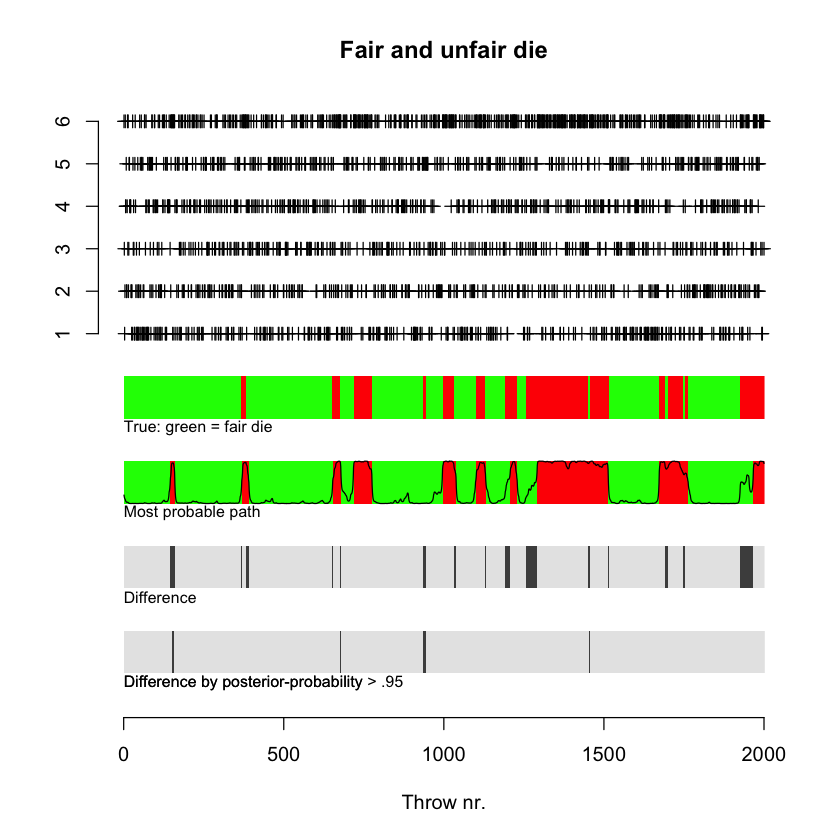

In [15]:
##### EXAMPLE 1: Dishonest casino example (from Durbin et. al. 1999) #####
# A dishonest Casino uses a fair dice most of the time, but switches to the loaded dice once in a while.
# The probabilities of the fair die are (1/6, ..., 1/6) for throwing ("1",...,"6").
# The probabilities of the loaded die are (1/10, ..., 1/10, 1/2) for throwing ("1",...,"5","6"). 
# The observer doesn’t know which die is actually taken (the state is hidden), 
# but the sequence of throws (observations) can be used to infer which die (state) was used.
# Can we detect which die is in use at any given time, just by observing the sequence of rolls?
# States = {Fair, Loaded}
# P(Fair --> Fair) = 0.95
# P(Fair --> Loaded) = 0.05
# P(Loaded --> Fair) = 0.1
# P(Loaded --> Loaded) = 0.9

par(bg = "white")

States = c('Fair', 'Loaded')
Symbols = c(1, 2, 3, 4, 5, 6)
observations = c(3, 2, 2, 1, 2, 3, 6, 6, 6, 6)
transProbs = matrix( c(0.95, 0.1, 
                       0.05,  0.9), 2)
transProbs
emissProbs = matrix( c(1/6, 1/10, 
                       1/6, 1/10,
                       1/6, 1/10,
                       1/6, 1/10,
                       1/6, 1/10,
                       1/6, 1/2 ), 2)
emissProbs
hmm = initHMM(States, Symbols, c(0.5, 0.5), transProbs, emissProbs)
hmm
viterbi(hmm, observations) # we get the most probable path of hidden states


# Dishonest casino example
dishonestCasino()
# she run some lines and received some charts. 23:00


In [16]:
#_______________________________________________________________________________

In [17]:
##### EXAMPLE 2: DNA sequence #####
# In a HMM, the nucleotides (A, T, G, C) found at a particular position 
# in a sequence depends on the "state" at the previous nucleotide position in the sequence. 
# The "state" at a sequence position is a property of that position of the sequence, 
# for example, a particular HMM may model the positions along a sequence as belonging to 
# either one of two states, GC-rich or AT-rich. 
# It is of interest because GC-rich zones are less subject to mutations (the bond is stronger).

# Consider the following HMM model that consists of two states 'GC' and 'AT'-rich as hidden states. 
# The tentative guess about the transition and emission probabilities are given by T and E below.
#           GC    AT
# T =  GC [0.8   0.2
#      AT  0.75  0.25]

#         GC   AT
# E = A [0.1  0.4   
#     C  0.4  0.1   
#     G  0.4  0.1    
#     T  0.1  0.4]  

# Given the observed sequence of nucleotides
# X = CAGCCCTAGTTGCCCCCAGAGGCAGGTAAATAGCCA
# (a) Estimate E (Emission matrix) and T (Transition matrix) from the observed sequence
# (b) What is the most probable path for generating the observed sequence, 
#     given the estimated E and T ?
# (c) For each position i in the sequence, what are the posterior probabilities of P(Yi = GC|X) and P(Yi =AT|X)

# Solution: 

States = c('GC','AT')
Symbols = c('A','C','G','T')
startProbs = c(0.5,0.5) # one over the number of states if they didnt't give us the initial probabilities
transProbs = matrix(c(0.80, 0.20, 
                      0.75, 0.25), nrow=2, ncol=2, byrow=TRUE)
transProbs
emissionProbs = matrix(c(0.10,0.40,
                         0.40,0.10,
                         0.40,0.10,
                         0.10,0.40), nrow=4, ncol=2,byrow=TRUE)
emissionProbs
observation = c('C','A','G','C','C','C','T','A','G','T','T','G','C','C','C','C','C','A',
                'G','A','G','G','C','A','G','G','T','A','A','A','T','A','G','C','C','A')


0.80,0.20
0.75,0.25


0.1,0.4
0.4,0.1
0.4,0.1
0.1,0.4


In [18]:
## Point a
# Estimate E (Emission matrix) and T (Transition matrix) from the observed sequence 

# For an initial Hidden Markov Model and a given sequence of observations, 
# the Baum-Welch algorithm infers optimal parameters to the HMM. 

hmm = initHMM(States, Symbols, startProbs, transProbs, emissionProbs)
HMM = baumWelch(hmm, observation, maxIterations=100, delta=1E-9)

HMM
# estimation of E from the observed sequence
HMM$hmm$emissionProbs

# estimation of T from the observed sequence
HMM$hmm$transProbs

# The inferred HMM is used for the next tasks.

$hmm
$hmm$States
[1] "GC" "AT"

$hmm$Symbols
[1] "A" "C" "G" "T"

$hmm$startProbs
 GC  AT 
0.5 0.5 

$hmm$transProbs
    to
from        GC        AT
  GC 0.5833334 0.4166666
  AT 0.1739130 0.8260870

$hmm$emissionProbs
      symbols
states            A            C            G            T
    GC 7.976447e-08 9.999999e-01 4.253656e-11 3.118592e-32
    AT 4.166666e-01 1.727890e-08 3.750000e-01 2.083333e-01


$difference
  [1] 3.595936e-01 5.849140e-02 5.952642e-02 6.269208e-02 6.831367e-02
  [6] 7.665456e-02 8.775307e-02 1.009221e-01 1.135373e-01 1.199883e-01
 [11] 1.140808e-01 9.585668e-02 7.421938e-02 5.944110e-02 5.365363e-02
 [16] 5.179610e-02 5.059403e-02 4.924242e-02 4.769687e-02 4.603113e-02
 [21] 4.427469e-02 4.239869e-02 4.034383e-02 3.805335e-02 3.549801e-02
 [26] 3.268891e-02 2.967788e-02 2.654817e-02 2.339957e-02 2.033246e-02
 [31] 1.743445e-02 1.477176e-02 1.238580e-02 1.029415e-02 8.494559e-03
 [36] 6.970354e-03 5.695815e-03 4.640834e-03 3.774399e-03 3.066924e-03
 [41] 2.491584e-03 2.024920e-03 1.646947e-03 1.340962e-03 1.093201e-03
 [46] 8.924322e-04 7.295591e-04 5.972454e-04 4.895920e-04 4.018622e-04
 [51] 3.302531e-04 2.717101e-04 2.237765e-04 1.844736e-04 1.522044e-04
 [56] 1.256775e-04 1.038466e-04 8.586186e-05 7.103190e-05 5.879307e-05
 [61] 4.868502e-05 4.033112e-05 3.342275e-05 2.770669e-05 2.297484e-05
 [66] 1.905605e-05 1.580935e-05 1.311853e-05 1.088773e-05 9.037792e-06
 [71] 7.503311e-06 6.230212e-06 5.173760e-06 4.296931e-06 3.569068e-06
 [76] 2.964775e-06 2.463009e-06 2.046324e-06 1.700258e-06 1.412814e-06
 [81] 1.174041e-06 9.756813e-07 8.108827e-07 6.739574e-07 5.601838e-07
 [86] 4.656417e-07 3.870758e-07 3.217829e-07 2.675179e-07 2.224160e-07
 [91] 1.849281e-07 1.537673e-07 1.278646e-07 1.063317e-07 8.843064e-08
 [96] 7.354807e-08 6.117445e-08 5.088627e-08 4.233163e-08 3.521806e-08

,A,C,G,T
GC,7.976447e-08,9.999999e-01,4.253656e-11,3.118592e-32
AT,4.166666e-01,1.727890e-08,3.750000e-01,2.083333e-01


,GC,AT
GC,0.5833334,0.4166666
AT,0.1739130,0.8260870


In [19]:
## Point b
# What is the most probable path for generating the observed sequence, given the estimated E and T ?
# The Viterbi-algorithm computes the most probable 
# path of states for a sequence of observations for a given Hidden Markov Model.
viterbi(HMM$hmm, observation)

[1] "GC" "AT" "AT" "GC" "GC" "GC" "AT" "AT" "AT" "AT" "AT" "AT" "GC" "GC" "GC"
[16] "GC" "GC" "AT" "AT" "AT" "AT" "AT" "GC" "AT" "AT" "AT" "AT" "AT" "AT" "AT"
[31] "AT" "AT" "AT" "GC" "GC" "AT"

In [20]:
## Point c
# For each position i in the sequence, 
# what are the posterior probabilities of P(Yi = GC|X) and P(Yi =AT|X)
posterior(HMM$hmm, observation)

# This function computes the posterior probabilities of being in state X at time k 
# for a given sequence of observations and a given Hidden Markov Model. 


detach("package:HMM", unload = TRUE) 
# BE CAREFUL! it create conflicts with the next library we will use


,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,36
GC,1.000000e+00,1.351798e-07,8.009815e-11,1.00000e+00,1.000000e+00,1.00000e+00,1.057039e-31,2.032779e-08,1.204482e-11,1.589532e-32,...,1.589532e-32,2.032779e-08,2.032779e-08,2.032779e-08,1.589532e-32,2.032779e-08,8.00981e-11,1.00000e+00,1.000000e+00,2.680086e-07
AT,3.425729e-08,9.999999e-01,1.000000e+00,2.44695e-08,3.679624e-09,2.44695e-08,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.00000e+00,2.44695e-08,2.446949e-08,9.999997e-01
